In [3]:
#pip3 install -U scikit-learn scipy matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer



In [4]:
df_original = pd.read_csv('well_header0.csv')
tvd=df_original['TVD']

In [5]:
df = pd.read_csv('well_header_clean.csv')

In [25]:
df

,Unnamed: 0,EPAssetsId,Surf_Township,Surf_Range,Surf_Section,Surf_Longitude,Surf_Latitude,BH_Range,GroundElevation,KBElevation,...,PSACAreaCode_AB5,PSACAreaCode_AB7,PSACAreaCode_SK2,PSACAreaName_Central Alberta,PSACAreaName_East Central Alberta,PSACAreaName_Foothills,PSACAreaName_Foothills Front,PSACAreaName_Northwestern Alberta,PSACAreaName_Southeastern Alberta,PSACAreaName_Southwestern Saskatchewan
0,0,0.905529,1.461555,1.101729,0.690251,-1.209427,1.476994,1.100705,-0.149104,-0.151524,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.886241,1.461555,1.101729,0.215376,-1.217531,1.472307,1.100705,-0.235332,-0.234411,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0.903415,1.461555,1.101729,0.215376,-1.217585,1.472192,1.100705,-0.229486,-0.231503,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0.897201,1.461555,1.101729,0.215376,-1.217867,1.466949,1.100705,-0.165911,-0.174063,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0.916208,1.523589,1.101729,-1.114272,-1.237129,1.512330,1.100705,-0.498401,-0.484527,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,6726,0.942196,-0.523509,-0.889929,-1.494172,0.350202,-0.546636,-0.888531,-0.099413,-0.101355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6727,6727,0.942197,-0.523509,-0.889929,-1.494172,0.350202,-0.546687,-0.888531,-0.100143,-0.101355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6728,6728,0.935376,-0.957741,-1.686592,-1.399197,-0.430784,-0.990001,-1.684226,3.268604,3.259213,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6729,6729,0.933248,-1.019775,-1.686592,1.450050,-0.423012,-1.001156,-1.684226,3.345332,3.313744,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
df1= df.drop(['Unnamed: 0', 'EPAssetsId'], axis = 1)
df1

,Surf_Township,Surf_Range,Surf_Section,Surf_Longitude,Surf_Latitude,BH_Range,GroundElevation,KBElevation,TotalDepth,DaysDrilling,...,PSACAreaCode_AB5,PSACAreaCode_AB7,PSACAreaCode_SK2,PSACAreaName_Central Alberta,PSACAreaName_East Central Alberta,PSACAreaName_Foothills,PSACAreaName_Foothills Front,PSACAreaName_Northwestern Alberta,PSACAreaName_Southeastern Alberta,PSACAreaName_Southwestern Saskatchewan
0,1.461555,1.101729,0.690251,-1.209427,1.476994,1.100705,-0.149104,-0.151524,0.351672,-0.065173,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.461555,1.101729,0.215376,-1.217531,1.472307,1.100705,-0.235332,-0.234411,0.288238,-0.065173,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.461555,1.101729,0.215376,-1.217585,1.472192,1.100705,-0.229486,-0.231503,0.281593,-0.098614,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.461555,1.101729,0.215376,-1.217867,1.466949,1.100705,-0.165911,-0.174063,0.334152,-0.132054,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.523589,1.101729,-1.114272,-1.237129,1.512330,1.100705,-0.498401,-0.484527,0.383087,-0.265818,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,-0.523509,-0.889929,-1.494172,0.350202,-0.546636,-0.888531,-0.099413,-0.101355,-0.578087,0.102032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6727,-0.523509,-0.889929,-1.494172,0.350202,-0.546687,-0.888531,-0.100143,-0.101355,-0.573253,0.035150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6728,-0.957741,-1.686592,-1.399197,-0.430784,-0.990001,-1.684226,3.268604,3.259213,1.514022,-0.165495,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6729,-1.019775,-1.686592,1.450050,-0.423012,-1.001156,-1.684226,3.345332,3.313744,1.059715,-0.265818,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# Train test split
#X_train, X_test, y_train, y_test = train_test_split(df,tvd,test_size=0.2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df1,tvd,test_size=0.2,random_state=42)

In [8]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)  

NameError: name 'preprocessing' is not defined

In [8]:
# Using StandardScaler()
#scaler = StandardScaler()
scaler = QuantileTransformer()
scaler.fit(X_train)  # doctest: +SKIP
X_train_s = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
X_test_s = scaler.transform(X_test)  # doctest: +SKIP

In [11]:
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)
pred= lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test,pred)
linrmse=np.sqrt(lin_mse)


lin_reg.fit(X_train_s,y_train)
pred_s= lin_reg.predict(X_test_s)
lin_mse_s = mean_squared_error(y_test,pred_s)
linrmse_s=np.sqrt(lin_mse_s)

linrmse

175555356886.94745

In [12]:
linrmse_s

980030011755.4928

In [13]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
pred_rf= rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test,pred_rf)
rfrmse=np.sqrt(rf_mse)

rf_reg.fit(X_train_s,y_train)
pred_s= lin_reg.predict(X_test_s)
rfmse_s = mean_squared_error(y_test,pred_s)
rfrmse_s=np.sqrt(rfmse_s)

rfrmse


97.18716581067672

In [14]:
rfrmse_s

980030011755.4928

In [15]:
ab_reg = AdaBoostRegressor()
ab_reg.fit(X_train,y_train)
pred_ab= ab_reg.predict(X_test)
ab_mse = mean_squared_error(y_test,pred_ab)
abrmse=np.sqrt(ab_mse)
abrmse

187.1926882944855

In [108]:
gd_reg = GradientBoostingRegressor()
gd_reg.fit(X_train,y_train)
pred_gd= ab_reg.predict(X_test)
gd_mse = mean_squared_error(y_test,pred_gd)
gdrmse=np.sqrt(gd_mse)
gdrmse

178.11831496191766

In [17]:
gdh_reg = HistGradientBoostingRegressor()
gdh_reg.fit(X_train,y_train)
pred_gdh= ab_reg.predict(X_test)
gdh_mse = mean_squared_error(y_test,pred_gdh)
gdhrmse=np.sqrt(gdh_mse)
gdhrmse

187.1926882944855

In [18]:

ann_reg = MLPRegressor()
ann_reg.fit(X_train,y_train)
pred_ann= ann_reg.predict(X_test)
ann_mse = mean_squared_error(y_test,pred_ann)
annrmse=np.sqrt(ann_mse)
annrmse

C:\Users\malauddin\.conda\envs\tenserflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


136.0931913252386

In [123]:
# Using StandardScaler()
#scaler = QuantileTransformer()
#scaler.fit(X_train)  # doctest: +SKIP
#X_train = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
#X_test = scaler.transform(X_test)  # doctest: +SKIP
# Using StandardScaler()
#scaler1 = StandardScaler()
#scaler1.fit(y_train)  # doctest: +SKIP
#y_train = y_train/y_train.max()  # doctest: +SKIP
# apply same transformation to test data
#y_test = y_test/y_test.max()  # doctest: +SKIP
#X_train
#y_train
#y_test

In [20]:
              




ann_reg = MLPRegressor(
                        hidden_layer_sizes=(100,100),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
                        learning_rate='adaptive', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=False,
                        random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                        early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    
ann_reg.fit(X_train,y_train)
pred_ann= ann_reg.predict(X_test)
ann_mse = mean_squared_error(y_test,pred_ann)
annrmse=np.sqrt(ann_mse)
annrmse

95.53159339892635

In [14]:
# Define modelusing Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(Dense(100, input_dim=641, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss',min_delta=1e-3, patience=10, verbose=1,mode='auto')
hist=model.fit(X_train,y_train, epochs=500, validation_split=0.2,shuffle=True, verbose=1, callbacks=[early_stop])



Train on 4307 samples, validate on 1077 samples
Epoch 1/500
4307/4307 [==============================] - 1s 126us/step - loss: 1381091.7087 - val_loss: 77001.5730
Epoch 2/500
4307/4307 [==============================] - 0s 93us/step - loss: 45929.0447 - val_loss: 31136.4879
Epoch 3/500
4307/4307 [==============================] - 1s 137us/step - loss: 22249.1297 - val_loss: 19381.9813
Epoch 4/500
4307/4307 [==============================] - 0s 100us/step - loss: 14546.2398 - val_loss: 15607.8905
Epoch 5/500
4307/4307 [==============================] - 0s 89us/step - loss: 11290.7006 - val_loss: 12169.4543
Epoch 6/500
4307/4307 [==============================] - 0s 104us/step - loss: 9131.6817 - val_loss: 10885.9223
Epoch 7/500
4307/4307 [==============================] - 0s 102us/step - loss: 7552.6490 - val_loss: 9174.2812
Epoch 8/500
4307/4307 [==============================] - 0s 87us/step - loss: 6618.0039 - val_loss: 8176.3315
Epoch 9/500
4307/4307 [==============================]

4307/4307 [==============================] - 1s 126us/step - loss: 892.4784 - val_loss: 2957.9305
Epoch 75/500
4307/4307 [==============================] - 0s 91us/step - loss: 828.6101 - val_loss: 2380.1195
Epoch 76/500
4307/4307 [==============================] - 0s 84us/step - loss: 874.8127 - val_loss: 2721.5094
Epoch 77/500
4307/4307 [==============================] - 0s 108us/step - loss: 926.0173 - val_loss: 2418.8461
Epoch 78/500
4307/4307 [==============================] - 0s 102us/step - loss: 870.8554 - val_loss: 2525.3222
Epoch 79/500
4307/4307 [==============================] - 0s 85us/step - loss: 925.5618 - val_loss: 3624.6716
Epoch 80/500
4307/4307 [==============================] - 0s 89us/step - loss: 900.8731 - val_loss: 2455.2467
Epoch 81/500
4307/4307 [==============================] - 1s 121us/step - loss: 867.2974 - val_loss: 2503.9128
Epoch 82/500
4307/4307 [==============================] - 0s 84us/step - loss: 870.7293 - val_loss: 2901.7782
Epoch 83/500
4307/4

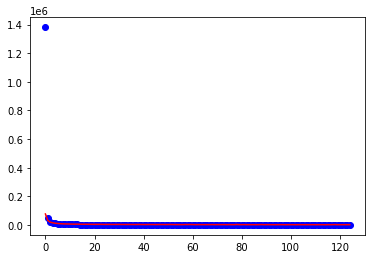

In [15]:
#Plot Hist

#history_dict=history.history
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])

#history_dict=hist.history
loss_values=hist.history['loss']
val_loss_values=hist.history['val_loss']
plt.plot(loss_values,'bo', label='training loss')
plt.plot(val_loss_values,'r', label='validation loss')
plt.show()

In [17]:
#Prediction
predictions = model.predict(X_test)
annrmse=np.sqrt(mean_squared_error(y_test,predictions))
annrmse

90.67985125565443

In [19]:
# Define modelusing Keras with dropout layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(Dense(100, input_dim=641, activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(100, activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(50, activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss',min_delta=1e-3, patience=10, verbose=1,mode='auto')
hist=model.fit(X_train,y_train, epochs=500, validation_split=0.2,shuffle=True, verbose=1, callbacks=[early_stop])


Train on 4307 samples, validate on 1077 samples
Epoch 1/500
4307/4307 [==============================] - 1s 176us/step - loss: 1709261.6398 - val_loss: 121670.6268
Epoch 2/500
4307/4307 [==============================] - 0s 102us/step - loss: 149915.8661 - val_loss: 44951.4592
Epoch 3/500
4307/4307 [==============================] - 1s 128us/step - loss: 123060.3281 - val_loss: 29906.5196
Epoch 4/500
4307/4307 [==============================] - 1s 117us/step - loss: 108620.7006 - val_loss: 25072.8622
Epoch 5/500
4307/4307 [==============================] - 0s 111us/step - loss: 103600.5721 - val_loss: 20572.6574
Epoch 6/500
4307/4307 [==============================] - 1s 141us/step - loss: 101896.3923 - val_loss: 23594.7945
Epoch 7/500
4307/4307 [==============================] - 1s 121us/step - loss: 92868.0190 - val_loss: 15520.0352
Epoch 8/500
4307/4307 [==============================] - 0s 104us/step - loss: 98251.6503 - val_loss: 17392.6816
Epoch 9/500
4307/4307 [=================

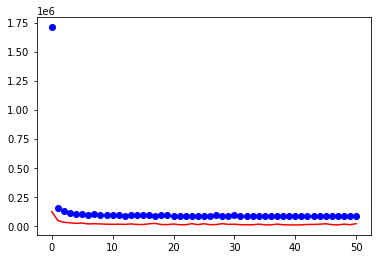

In [20]:
#Plot Hist

#history_dict=history.history
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])

#history_dict=hist.history
loss_values=hist.history['loss']
val_loss_values=hist.history['val_loss']
plt.plot(loss_values,'bo', label='training loss')
plt.plot(val_loss_values,'r', label='validation loss')
plt.show()

In [21]:
#Prediction
predictions = model.predict(X_test)
annrmse=np.sqrt(mean_squared_error(y_test,predictions))
annrmse

152.63525805881775

In [12]:

test_df = pd.read_csv('test0.csv')